# Tutorial: Clasificador Lineal — Perceptrón
---
Por Aldo Garcia Castañeda

## 1.1 Fundamentos de la técnica

El **Perceptrón** es un clasificador lineal simple propuesto por Frank Rosenblatt (1957).  
Su objetivo principal es encontrar un hiperplano que separe dos clases linealmente separables a tráves de una función de activación.  
Es un proceso **supervisado**, es decir, entrena con entradas previamente clasificadas ajustando pesos (w) y un bias (b) para mejorar la clasificación.  
Los pesos y bias son inicializados de manera arbitraria e iterativamente son ajustados hasta obtener la salida deseada.

Algoritmo básico:
- Selección de patrones de entrada (x)
- Inicializar pesos (w) y sesgo (b) con valores pequeños
- Para cada patrón:
  - calcula la salida del perceptrón con la función de activación
  - calcula el error. Si la salida no es la esperada:
      - ajusta pesos (w) y sesgo (b)
- Repetir hasta que para cada patron de entrada la salida calculada sea igual a la deseada.

## 1.2 Modelo Matemático del Perceptrón

$z = \mathbf{w}^T\mathbf{x} + b$  
$\hat{y} = \text{sign}(z)$  

Donde:  
- **x**: vector de entrada ($[x_1, x_2, ..., x_n]$)
- **$w^T$**: la traspuesta del vector de pesos ($[w_1, w_2, ..., w_n]$)
- **b**: bias o sesgo
- **z**: resultado de combinación lineal
- **$\hat{y}$**: predicción
- **$\text{sign}(z)$**: función de activación (1 si $z > 0$; 0 si $z < 0$)

**Algoritmo de Entrenamiento:**  
$\mathbf{w} \leftarrow \mathbf{w} + \eta (y-\hat{y}) \mathbf{x}$  
$b \leftarrow b + \eta (y-\hat{y})$

## 1.3 Librerías, clases y funciones (Python)

- **matplotlib**: librería de gráficos de python
- **sklearn.datasets.make_classification**: crea conjuntos de datos sintéticos, ideal para demostraciones
- **sklearn.model_selection.train_test_split**: función del módulo scikit-learn que divide los datos en entrenamiento y aprendizaje
- **sklearn.preprocessing.StandardScaler**: normaliza los datos usando la desviación estándar
- **sklearn.linear_model.Perceptron**: contiene el modelo del algoritmo, Perceptrón
- **sklearn.metrics**: módulo de evaluación del rendimiento

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

RANDOM_STATE = 42

## 1.4 Pipeline

### 1.4.1 Feature Engineering
Se utilizarán datos sintéticos obtenidos de **make_classification** una función del módulo sklearn.datasets diseñado para tareas de clasificación binaria. Los parámetros configuran el conjunto de datos de la siguiente manera:
- **n_samples=400**: genera 400 muestras
- **n_features=2**: cada muestra tiene dos características, permitiendo visualizar en 2D ($x_1, x_2)$
- **n_informative=2**: ambas características contribuyen a la separación de clases
- **n_redundant=0**: sin características redundantes
- **n_clusters_per_class=1**: cada clase forma un único clúster
- **class_sep=2.0**: 2 clases bien separadas para hacer una clasificación lineal
- **random_state=RANDOM_STATE**: se fija una semilla para reproducir el conjunto de datos

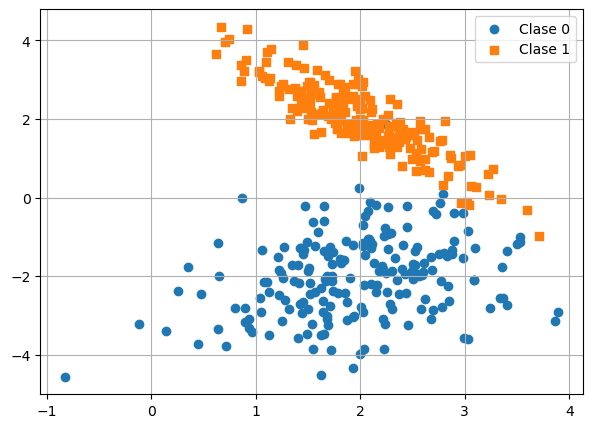

In [8]:
# Generar datos sintéticos
X, y = make_classification(n_samples=400, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=2.0, random_state=RANDOM_STATE)

# Mostrar gráficamente la dispersión de los datos (nótese la clara separación de los datos)
plt.figure(figsize=(7,5))
plt.scatter(X[y==0,0], X[y==0,1], marker='o', label='Clase 0')
plt.scatter(X[y==1,0], X[y==1,1], marker='s', label='Clase 1')
plt.legend(); plt.grid(True); plt.show()

### 1.4.2 Model Selection
Dado el conjunto de datos sintéticos, se puede observar en el gráfico cómo los datos son linealmente separables haciendo ideal un **Perceptrón** por su clasificación lineal.

In [9]:
# Configura un modelo de perceptrón para clasificación binaria
# Hasta 1000 iteraciones, tolerancia de error de 0.001, tasa de aprendizaje fija de 1.0
clasificador = Perceptron(max_iter=1000, tol=1e-3, eta0=1.0, random_state=RANDOM_STATE)

### 1.4.3 Model Training
Se separan las muestras para entrenamiento y pruebas con la función **train_test_split** eligiendo un 25% de las muestras para pruebas.  
Se entrena el perceptrón con la función **fit** y el 75% de los datos de entrada separados mediante la función.

In [10]:
# Divide el conjunto de datos X (características) y y (etiquetas) en entrenamiento y prueba.
# test_size=0.25 indica que el 25% de los datos se usarán para prueba.
# stratify=y mantiene la proporción de clases en ambas divisiones.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)

# Entrena el modelo usando los datos de entrenamiento.
clasificador.fit(X_train, y_train)

# Imprime la precisión del modelo sobre el conjunto de entrenamiento.
# score calcula la proporción de predicciones correctas.
print('Accuracy (train):', clasificador.score(X_train, y_train))

Accuracy (train): 0.9766666666666667


### 1.4.4 Prediction
Con el modelo entrenado, podemos ejecutar las predicciones correspondientes con el conjunto de pruebas.

In [11]:
# Genera las predicciones del modelo entrenado sobre el conjunto de prueba X_test.
# El resultado y_pred contiene las etiquetas predichas para cada muestra de prueba.
y_pred = clasificador.predict(X_test)

### 1.4.5 Evaluation
Se obtiene la métrica **accuracy** que nos indica la proporción de predicciones correctas.  
Es decir, un accuracy del 0.95 indica que el 95% de las predicciones fueron acertadas.

In [12]:
# Calcula la precisión del modelo comparando las etiquetas reales (y_test) con las predichas (y_pred).
# La precisión (accuracy) es la proporción de predicciones correctas sobre el total de muestras evaluadas.
acc = accuracy_score(y_test, y_pred)
print('Accuracy (test):', acc)

Accuracy (test): 0.95


## 2. Notebook
El presente notebook se puedan interpretar y ejecutar, sin errores, en Jupyter y/o Google Colab

## 3. Referencias Bibliográficas
- Aviña Méndez, J. A. (s. f.). Perceptron [Diapositivas]. Google Slides. https://docs.google.com/presentation/d/1ALbozIgWrNw6M1ocM15avJtosnMOnxaGw1L_QIkVEV4
- Chandra, A. L. (2022, 27 septiembre). Perceptron Learning Algorithm: A Graphical Explanation Of Why It Works. Medium. https://medium.com/data-science/perceptron-learning-algorithm-d5db0deab975
- Naik, S. (2019, 19 marzo). Derivations and steps of Perceptron Algorithm. Medium. https://medium.com/@shyamsundar.naik/derivations-and-steps-used-when-perceptron-algorithm-with-log-loss-function-used-bd0f74278db6
- Serengil, S. (2021, 26 mayo). A Step by Step Perceptron Example - Sefik Ilkin Serengil. Sefik Ilkin Serengil. https://sefiks.com/2020/01/04/a-step-by-step-perceptron-example/?authuser=0&hl=es
- ChatGPT